## Homework - California Housing Prices

In this homework, we will create a classification model that predicts for the California Housing Prices data set, available in this [link](https://www.kaggle.com/datasets/camnugent/california-housing-prices) from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


For the rest of the homework, we'll need to use only these columns:

In [3]:
features = ['latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'median_house_value',
            'ocean_proximity',]

## Data preparation
- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [4]:
housing_df = df[features]
housing_df = housing_df.fillna(0)

housing_df.loc[:, 'rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df.loc[:, 'bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df.loc[:, 'population_per_household'] = housing_df['population'] / housing_df['households']

### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

- NEAR BAY
- <1H OCEAN
- INLAND
- NEAR OCEAN

In [5]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

A: <1H OCEAN is the most frequent observation.

### Question 2
- Create the correlation matrix for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Options:

- total_bedrooms and households
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms


In [6]:
# Numerical columns:
housing_df.select_dtypes('number').dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [7]:
categorical = housing_df.select_dtypes('object').columns.to_list()
numerical = housing_df.select_dtypes('number').columns.to_list()

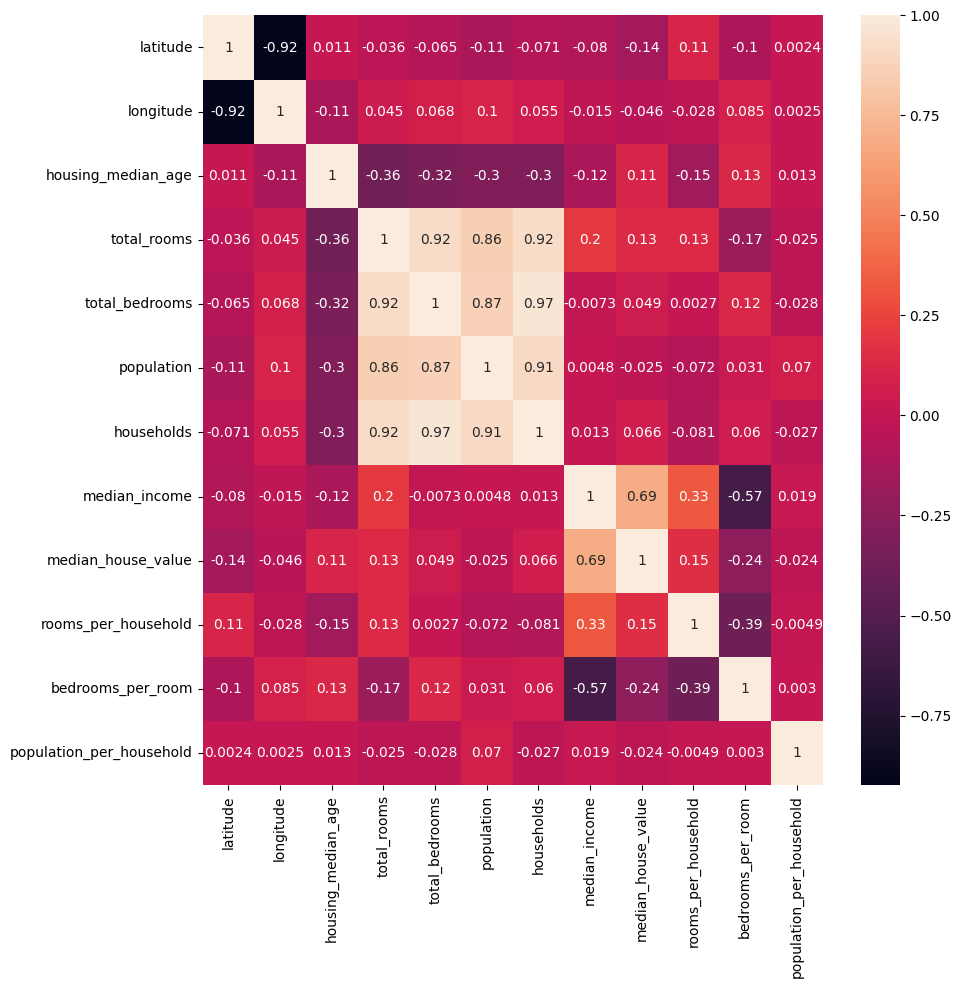

In [8]:
corr_matrix = housing_df[numerical].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

A: total_bedrooms and households.

## Make median_house_value binary
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [9]:
mean_value = housing_df['median_house_value'].mean()

housing_df.loc[:, 'above_average'] = 0
housing_df.loc[housing_df['median_house_value'] > mean_value, 'above_average'] = 1
housing_df['above_average'].value_counts()

0    12255
1     8385
Name: above_average, dtype: int64

## Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [10]:
from sklearn.model_selection import train_test_split

full_train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)

full_train_df.drop(['median_house_value'], axis=1, inplace=True)
train_df.drop(['median_house_value'], axis=1, inplace=True)
test_df.drop(['median_house_value'], axis=1, inplace=True)
val_df.drop(['median_house_value'], axis=1, inplace=True) 

### Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

Options:

- 0.26
- 0
- 0.10
- 0.16

In [11]:
from sklearn.metrics import mutual_info_score

mi = mutual_info_score(full_train_df['ocean_proximity'], full_train_df['above_average'])

print("Mutual info:", np.round(mi, 2))

Mutual info: 0.1


### Question 4
- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

- 0.60
- 0.72
- 0.84
- 0.95

In [12]:
from sklearn.feature_extraction import DictVectorizer

# Creation of features and label dataframes
X_train = train_df.drop('above_average', axis=1)
X_val = val_df.drop('above_average', axis=1)
X_test = test_df.drop('above_average', axis=1)

y_train = train_df['above_average']
y_val = val_df['above_average']
y_test = test_df['above_average']

# One-hot encoding

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

preds = model.predict(X_val)

score = accuracy_score(y_val, preds)

print("Accuracy:", np.round(score, 2))

Accuracy: 0.84


### Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?

Options:
- total_rooms
- total_bedrooms
- population
- households

In [14]:
model_coeffs = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
model_coeffs

{'bedrooms_per_room': 0.163,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.103,
 'longitude': 0.083,
 'median_income': 1.213,
 'ocean_proximity=<1H OCEAN': 0.464,
 'ocean_proximity=INLAND': -1.651,
 'ocean_proximity=ISLAND': 0.017,
 'ocean_proximity=NEAR BAY': 0.289,
 'ocean_proximity=NEAR OCEAN': 0.804,
 'population': -0.002,
 'population_per_household': 0.011,
 'rooms_per_household': -0.018,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

The least useful features (those with coefficients closer to zero) are: 
- total_rooms
- total_bedrooms
- population
- households

In [15]:
least_useful = ['total_rooms',
                'total_bedrooms',
                'population',
                'households']

X_train_least = train_df[least_useful]
X_val_least = val_df[least_useful]

model_least = LogisticRegression(solver="liblinear",
                                 C=1.0,
                                 max_iter=1000,
                                 random_state=42)

model_least.fit(X_train_least, y_train)

preds = model_least.predict(X_val_least)

score_least = accuracy_score(y_val, preds)

print("Accuracy with least important features:", np.round(score_least, 3))

Accuracy with least important features: 0.71


In [17]:
print("Accuracy differences:")
for feature in least_useful:

    feats = least_useful[:]
    feats.remove(feature)

    X_train_temp = train_df[feats]
    X_val_temp = val_df[feats]

    model.fit(X_train_temp, y_train)

    preds = model.predict(X_val_temp)

    score_temp = accuracy_score(y_val, preds)

    print(feature, np.round(score_least - score_temp, 3))

Accuracy differences:
total_rooms 0.082
total_bedrooms 0.049
population 0.053
households 0.038


The households feature has the smallest difference.

## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [18]:
full_train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=42)

# Creates features dataframes
X_train = train_df.drop(['above_average', 'median_house_value'], axis=1)
X_val = val_df.drop(['above_average', 'median_house_value'], axis=1)
X_test = test_df.drop(['above_average', 'median_house_value'], axis=1)

# Creates label arrays, with log transformation
y_train = np.log1p(train_df['median_house_value'])
y_val = np.log1p(val_df['median_house_value'])
y_test = np.log1p(test_df['median_house_value'])

# One-hot encoding

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)

    model_ridge.fit(X_train, y_train)

    preds_ridge = model_ridge.predict(X_val)

    score_ridge = mean_squared_error(y_val, preds_ridge, squared=False)

    print("Alpha = {}: {}".format(a, np.round(score_ridge, 3)))

Alpha = 0: 0.524
Alpha = 0.01: 0.524
Alpha = 0.1: 0.524
Alpha = 1: 0.524
Alpha = 10: 0.524


A: All the alphas yielded the same value, so we choose the smallest, alpha = 0